# NBA Team Pattern Analysis - Feature Engineering

## Overview

This notebook engineers features for discovering natural patterns and team archetypes in NBA data. We create features that capture different aspects of team performance, playing style, and composition to enable effective clustering and pattern discovery.

## Feature Categories

### Team Playing Style Features

* **Offensive Approach**
   * Pace and tempo metrics
   * Shot selection patterns
   * Ball movement indicators

* **Defensive Characteristics**
   * Pressure and aggression metrics
   * Paint protection measures
   * Transition defense indicators

* **Game Control Metrics**
   * Possession management
   * Tempo control
   * Strategic adjustments

### Team Composition Features

* **Roster Analysis**
   * Experience distribution
   * Age patterns
   * Player roles

* **Health Patterns**
   * Injury frequency
   * Recovery patterns
   * Availability trends

* **Utilization Metrics**
   * Rotation patterns
   * Minutes distribution
   * Role adaptability

### Performance Pattern Features

* **Efficiency Metrics**
   * Scoring efficiency
   * Defensive effectiveness
   * Resource utilization

* **Consistency Indicators**
   * Performance stability
   * Variance patterns
   * Adaptation metrics

* **Strategic Tendencies**
   * Play style preferences
   * Situational responses
   * Tactical patterns

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import json
from datetime import datetime

sys.path.append('..')
from src.features.feature_builder import FeatureBuilder
from src.data.utils import setup_logging

logger = setup_logging()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_theme()

## Data Loading and Exploration

Load the cleaned datasets and examine their structure to inform feature engineering decisions.

In [21]:
# Load all data sources
data_dir = '../data/processed'

# Load Team Statistics
print("Loading Team Statistics...")
team_stats = pd.read_csv(f'{data_dir}/team_stats.csv')
print(f"Team Stats Shape: {team_stats.shape}")
display(team_stats[['season', 'team', 'pts_per_game', 'fg_percent']].head())

# Load Player Statistics
print("\nLoading Player Statistics...")
player_stats = pd.read_csv(f'{data_dir}/player_season.csv')
print(f"Player Stats Shape: {player_stats.shape}")
display(player_stats[['season', 'player', 'team', 'age', 'experience']].head())

# Load Injury Summary
print("\nLoading Injury Summary...")
injuries = pd.read_csv(f'{data_dir}/injuries_summary.csv')
print(f"Injuries Shape: {injuries.shape}")
display(injuries.head())

Loading Team Statistics...
Team Stats Shape: (659, 29)


,season,team,pts_per_game,fg_percent
0,2025,ATL,116.1,0.463
1,2025,BOS,121.2,0.464
2,2025,BKN,111.8,0.468
3,2025,CHI,118.5,0.475
4,2025,CHA,107.5,0.424



Loading Player Statistics...
Player Stats Shape: (12281, 6)


,season,player,team,age,experience
0,2004,Aaron McKie,PHI,31,10
1,2004,Aaron Williams,BKN,32,10
2,2004,Adonal Foyle,GSW,28,7
3,2004,Adrian Griffin,HOU,29,5
4,2004,Al Harrington,IND,23,6



Loading Injury Summary...
Injuries Shape: (591, 4)


,year,team,count,conference
0,2004,ATL,20,EAST
1,2004,BKN,21,EAST
2,2004,BOS,16,EAST
3,2004,CHA,36,EAST
4,2004,CHI,25,EAST


## Feature Engineering Process

### Playing Style Features

Create features that capture team playing styles and strategic approaches.

Creating playing style features...

Sample of playing style features:


,team,season,pace_factor,three_point_rate,assist_rate,defensive_pressure,paint_protection,transition_rate
0,ATL,2025,106.204,0.392350,0.702830,15.5,0.100719,0.603659
1,BOS,2025,101.788,0.561462,0.619617,12.6,0.133838,0.629310
2,BKN,2025,99.516,0.480952,0.670051,10.1,0.084862,0.438356
3,CHI,2025,106.144,0.472467,0.665893,11.6,0.096033,0.454545
4,CHA,2025,101.720,0.491209,0.593264,13.3,0.112311,0.500000


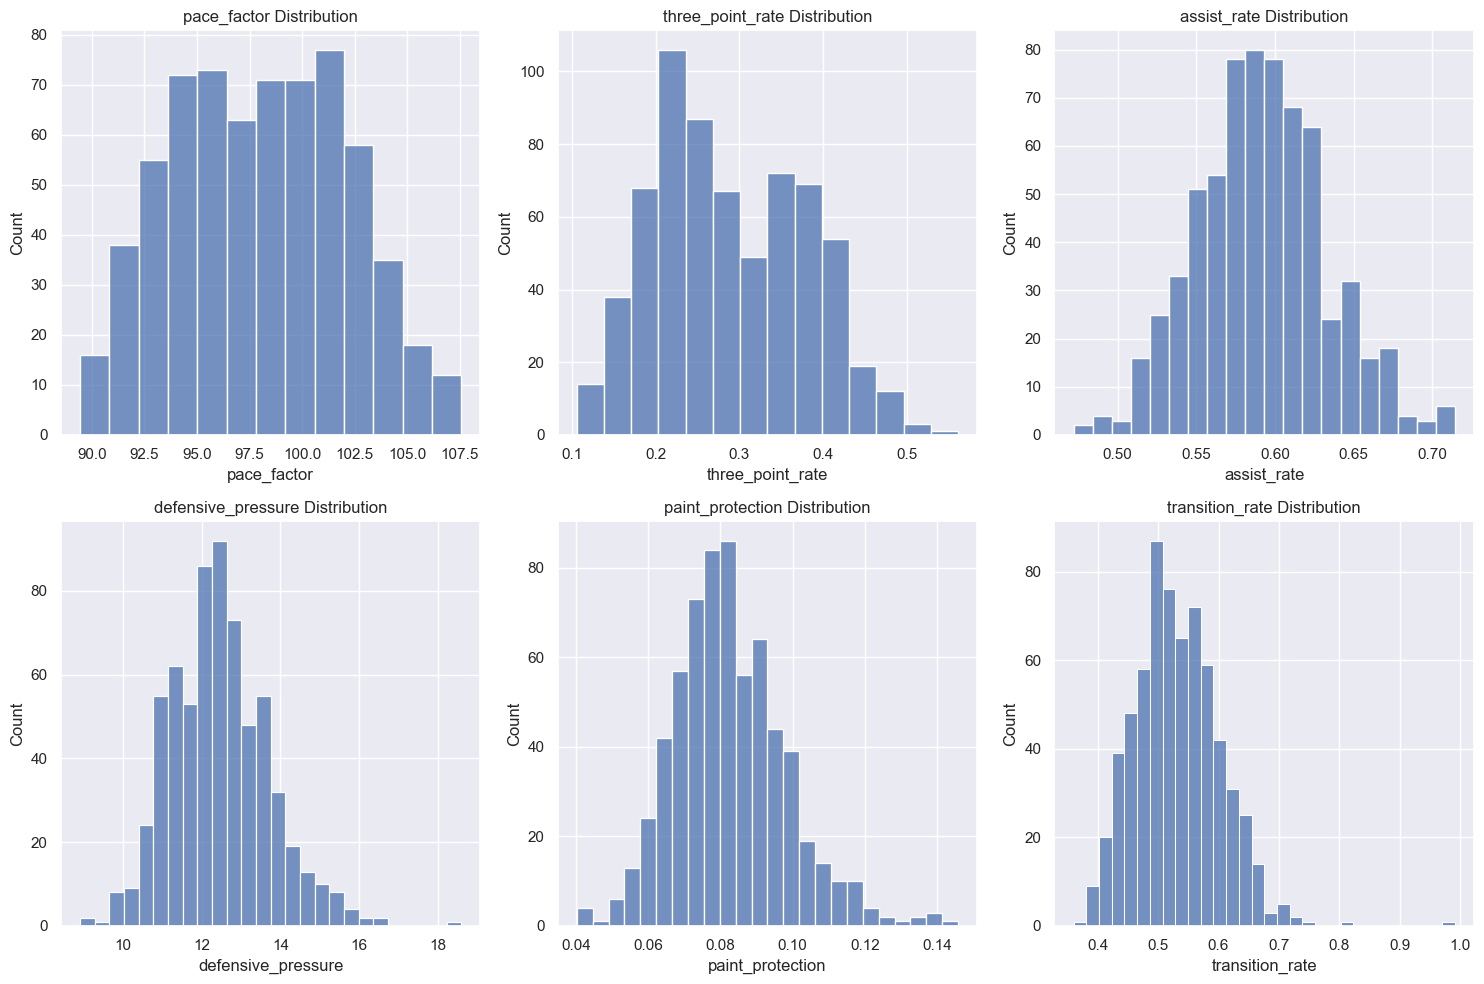

In [22]:
# Create playing style features
print("Creating playing style features...")
style_features = FeatureBuilder().create_style_features(team_stats)

# Display sample and distributions
style_sample = [
    'pace_factor', 'three_point_rate', 'assist_rate',
    'defensive_pressure', 'paint_protection', 'transition_rate'
]

print("\nSample of playing style features:")
display(style_features[['team', 'season'] + style_sample].head())

# Visualize feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(style_sample):
    sns.histplot(data=style_features, x=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Team Composition Features

Create features that describe team roster composition and characteristics.

Creating team composition features...

Sample of composition features:


,team,season,experience_mean,experience_var,age_skew,roster_stability,injury_rate,depth_score
0,ATL,2004,5.043478,8.770751,0.006747,1.0,20.0,0.047619
1,ATL,2005,6.750000,27.671053,0.569867,1.0,37.0,0.026316
2,ATL,2006,3.533333,8.838095,0.843310,1.0,32.0,0.030303
3,ATL,2007,4.000000,10.333333,0.951690,1.0,78.0,0.012658
4,ATL,2008,4.875000,14.916667,1.055617,1.0,39.0,0.025000


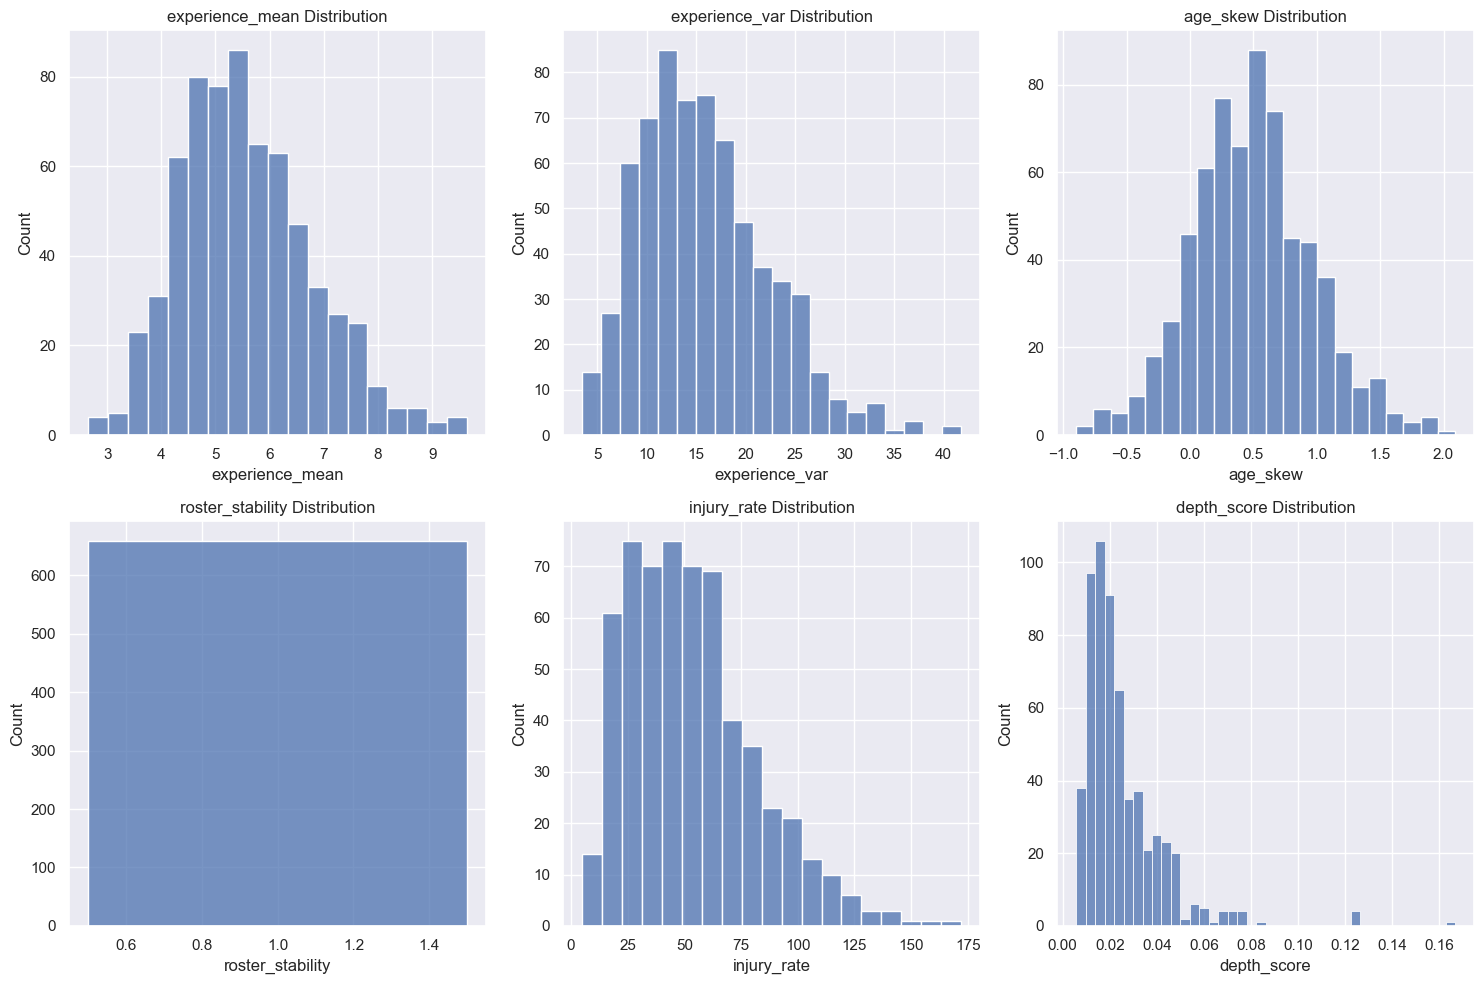

In [23]:
# Create composition features
print("Creating team composition features...")
composition_features = FeatureBuilder().create_composition_features(player_stats, injuries)

# Display sample and distributions
composition_sample = [
    'experience_mean', 'experience_var', 'age_skew',
    'roster_stability', 'injury_rate', 'depth_score'
]

print("\nSample of composition features:")
display(composition_features[['team', 'season'] + composition_sample].head())

# Visualize feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(composition_sample):
    sns.histplot(data=composition_features, x=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Performance Pattern Features

Create features that capture team performance patterns and tendencies.

Creating performance pattern features...

Sample of pattern features:


,team,season,true_shooting,off_efficiency,def_efficiency,offensive_rating,defensive_rating,consistency_score
0,ATL,2025,0.568538,1.093179,0.945122,0.936025,5.311585,4.971775
1,BOS,2025,0.604260,1.190710,1.086207,1.001575,4.540345,4.547495
2,BKN,2025,0.598399,1.123437,0.691781,0.975676,3.514247,3.428767
3,CHI,2025,0.594617,1.116408,0.753247,0.964289,4.007273,3.864169
4,CHA,2025,0.543368,1.056823,0.820988,0.888790,4.564691,4.057051


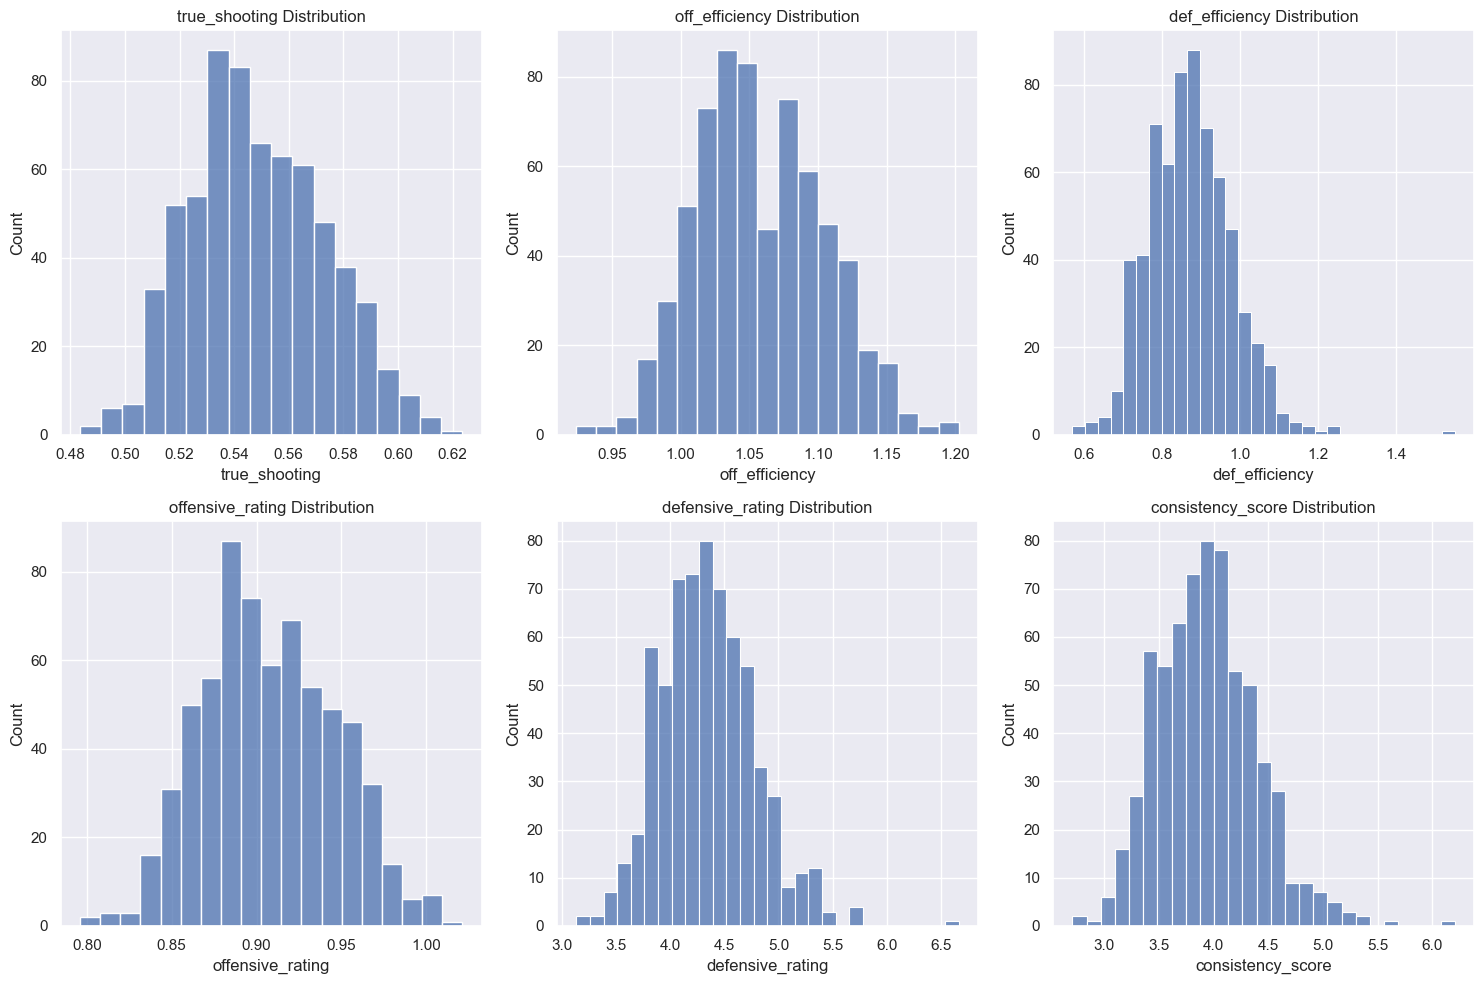

In [24]:
# Create performance pattern features
print("Creating performance pattern features...")
pattern_features = FeatureBuilder().create_pattern_features(team_stats)

# Display sample and distributions
pattern_sample = [
    'true_shooting', 'off_efficiency', 'def_efficiency',
    'offensive_rating', 'defensive_rating', 'consistency_score'
]

print("\nSample of pattern features:")
display(pattern_features[['team', 'season'] + pattern_sample].head())

# Visualize feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(pattern_sample):
    sns.histplot(data=pattern_features, x=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

## Feature Analysis

Analyze engineered features to ensure they're suitable for clustering and pattern discovery.

Combining all feature sets...


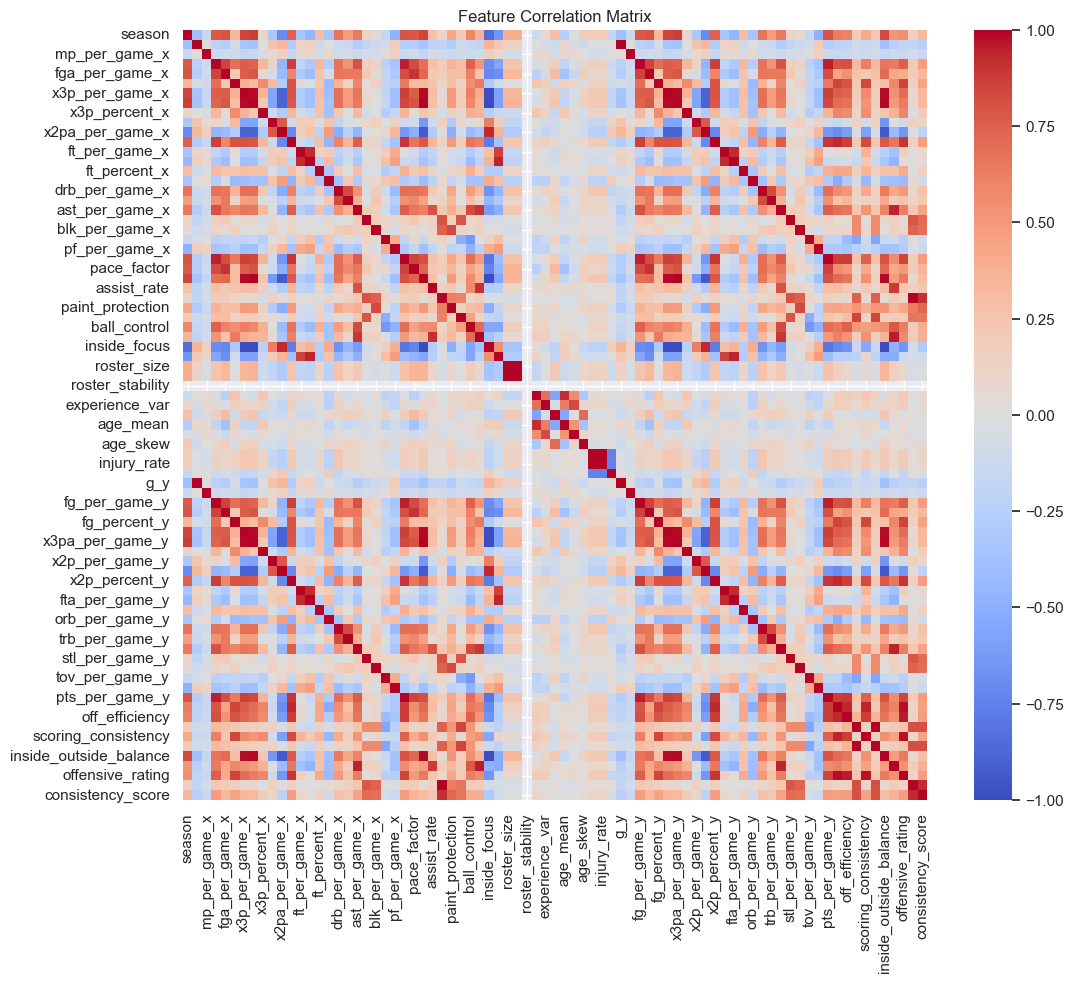


Highly correlated feature pairs (correlation > 0.8):
season - x3p_per_game_x: 0.851
season - x3pa_per_game_x: 0.872
season - three_point_rate: 0.851
season - inside_focus: -0.851
season - x3p_per_game_y: 0.851
season - x3pa_per_game_y: 0.872
season - inside_outside_balance: 0.833
g_x - g_y: 1.000
mp_per_game_x - mp_per_game_y: 1.000
fg_per_game_x - fga_per_game_x: 0.852
fg_per_game_x - x2p_percent_x: 0.860
fg_per_game_x - ast_per_game_x: 0.802
fg_per_game_x - pts_per_game_x: 0.947
fg_per_game_x - pace_factor: 0.826
fg_per_game_x - fg_per_game_y: 1.000
fg_per_game_x - fga_per_game_y: 0.852
fg_per_game_x - x2p_percent_y: 0.860
fg_per_game_x - ast_per_game_y: 0.802
fg_per_game_x - pts_per_game_y: 0.947
fg_per_game_x - off_efficiency: 0.818
fga_per_game_x - pts_per_game_x: 0.819
fga_per_game_x - pace_factor: 0.903
fga_per_game_x - fg_per_game_y: 0.852
fga_per_game_x - fga_per_game_y: 1.000
fga_per_game_x - pts_per_game_y: 0.819
fg_percent_x - fg_percent_y: 1.000
fg_percent_x - true_shooti

In [25]:
# Combine all feature sets
print("Combining all feature sets...")
feature_matrix = FeatureBuilder().combine_features(
    style_features,
    composition_features,
    pattern_features
)

# Calculate correlation matrix
corr_matrix = feature_matrix.select_dtypes(include=[np.number]).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Identify highly correlated features
threshold = 0.8
high_corr = np.where(np.abs(corr_matrix) > threshold)
high_corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
             for x, y in zip(*high_corr) if x != y and x < y]

print("\nHighly correlated feature pairs (correlation > 0.8):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} - {feat2}: {corr:.3f}")

## Feature Export

Save the engineered features and metadata for use in clustering and pattern analysis.

In [26]:
# Create output directory
output_dir = Path('../data/processed/features')
output_dir.mkdir(parents=True, exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Save feature matrix
feature_path = output_dir / f'pattern_features_{timestamp}.csv'
feature_matrix.to_csv(feature_path, index=False)
print(f"Feature matrix saved to: {feature_path}")

# Create and save metadata
metadata = {
    'timestamp': timestamp,
    'n_samples': len(feature_matrix),
    'n_features': feature_matrix.shape[1],
    'feature_names': feature_matrix.columns.tolist(),
    'feature_categories': {
        'style': style_sample,
        'composition': composition_sample,
        'pattern': pattern_sample
    },
    'data_quality': {
        'missing_values': feature_matrix.isnull().sum().to_dict(),
        'summary_statistics': feature_matrix.describe().to_dict()
    }
}

metadata_path = output_dir / f'pattern_features_{timestamp}_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"Metadata saved to: {metadata_path}")

Feature matrix saved to: ../data/processed/features/pattern_features_20250223_135521.csv
Metadata saved to: ../data/processed/features/pattern_features_20250223_135521_metadata.json


## Conclusions

We have successfully engineered three comprehensive feature sets for unsupervised learning analysis:

### Playing Style Features
* Captured offensive and defensive approaches
* Created metrics for strategic tendencies
* Quantified team pace and ball movement patterns

### Team Composition Features
* Analyzed roster experience and age distributions
* Quantified injury impacts and roster stability
* Created depth and utilization metrics

### Performance Pattern Features
* Developed efficiency and consistency metrics
* Created composite ratings for offense and defense
* Quantified strategic tendencies

These engineered features provide a robust foundation for the clustering analysis and pattern discovery in the next phase of our research.